# 1. Feature Engineering for Time Series Forecasting
## 1-1. Time Series Decomposition
### 1-1-1. Classical Decomposition

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
symbol = "AAPL"

df = yf.download(tickers=symbol, interval="1d")
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


In [3]:
df.columns = df.columns.droplevel(1)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


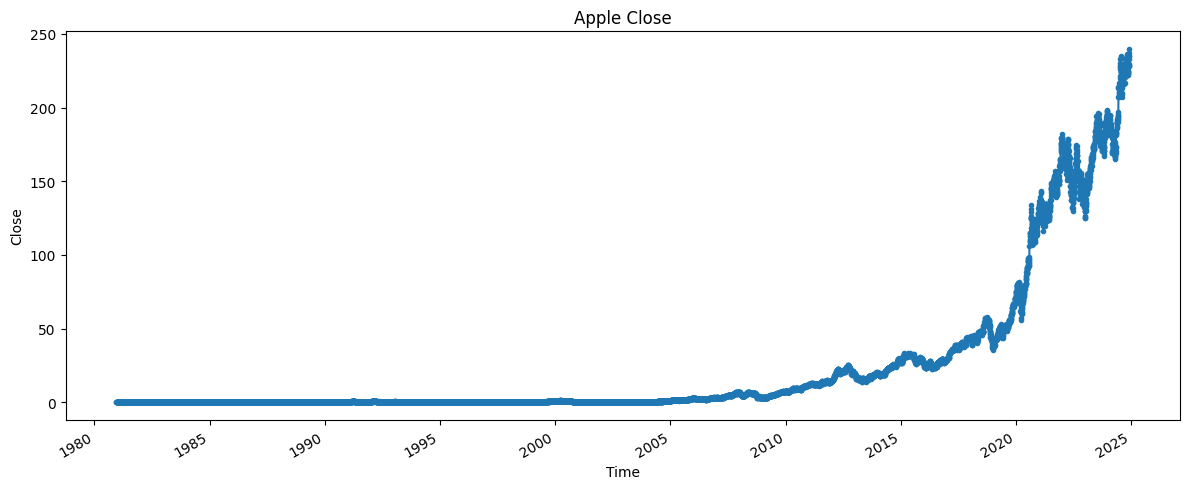

In [4]:
fig, ax = plt.subplots(figsize=[12, 5])

df['Close'].plot(ax=ax, marker=".")
ax.set_xlabel("Time")
ax.set_ylabel("Close")
ax.set_title("Apple Close")
plt.tight_layout()

In [5]:
# Compute trend
window_size = 252
df["Trend"] = (
    df['Close'].rolling(window=window_size)
    .mean()  # Apply the 12-MA without a centered window
    # The average is computed at the end of the window
    .rolling(window=2)
    .mean()  # Apply the 2-MA without a centred window
    # The average is computed at the end of the window
    .shift(-window_size // 2)  # Shift is required to align the 2x4-MA to what a
    # centered window would have produced
    # Integer division is used as shift() requires an int
)

In [6]:
# De-trend
df["Close_Detrended"] = df["Close"] - df["Trend"]
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,Trend,Close_Detrended
Date,,,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,NaN,NaN
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,NaN,NaN
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,NaN,NaN
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,NaN,NaN
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,NaN,NaN


In [7]:
# Average over each month
df["Month"] = df.index.month
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,Trend,Close_Detrended,Month
Date,,,,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,NaN,NaN,12
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,NaN,NaN,12
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,NaN,NaN,12
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,NaN,NaN,12
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,NaN,NaN,12


In [8]:
seasonality = df.groupby("Month").mean()["Close_Detrended"]
seasonality.name = "Seasonality"
seasonality

Month
1    -0.102321
2    -0.054007
3    -0.937728
4    -0.820864
5    -0.830217
6    -0.514394
7     0.264533
8     0.925576
9     0.313354
10   -0.140304
11    0.108137
12    0.403043
Name: Seasonality, dtype: float64

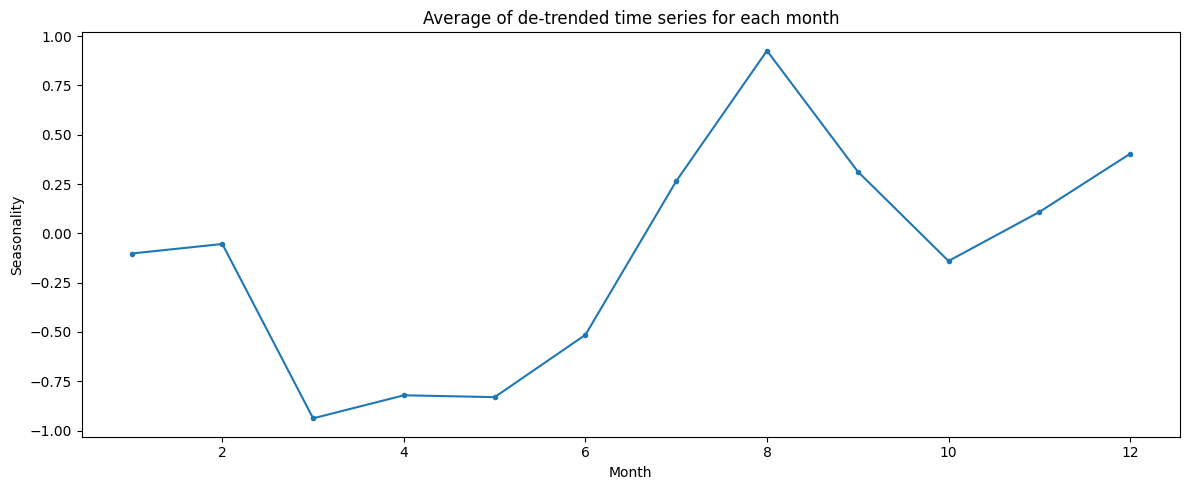

In [9]:
fig, ax = plt.subplots(figsize=[12, 5])
seasonality.plot(y="seasonality", ax=ax, marker=".")
ax.set_xlabel("Month")
ax.set_ylabel("Seasonality")
ax.set_title("Average of de-trended time series for each month")
plt.tight_layout()

In [10]:
df = df.merge(right=seasonality, left_on="Month", right_index=True)
df = df.sort_index()
df.head()

,Adj Close,Close,High,Low,Open,Volume,Trend,Close_Detrended,Month,Seasonality
Date,,,,,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,NaN,NaN,12,0.403043
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,NaN,NaN,12,0.403043
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,NaN,NaN,12,0.403043
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,NaN,NaN,12,0.403043
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,NaN,NaN,12,0.403043


In [11]:
df["Residual"] = df["Close"] - df["Trend"] - df["Seasonality"]
df.head()

,Adj Close,Close,High,Low,Open,Volume,Trend,Close_Detrended,Month,Seasonality,Residual
Date,,,,,,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,NaN,NaN,12,0.403043,NaN
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,NaN,NaN,12,0.403043,NaN
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,NaN,NaN,12,0.403043,NaN
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,NaN,NaN,12,0.403043,NaN
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,NaN,NaN,12,0.403043,NaN


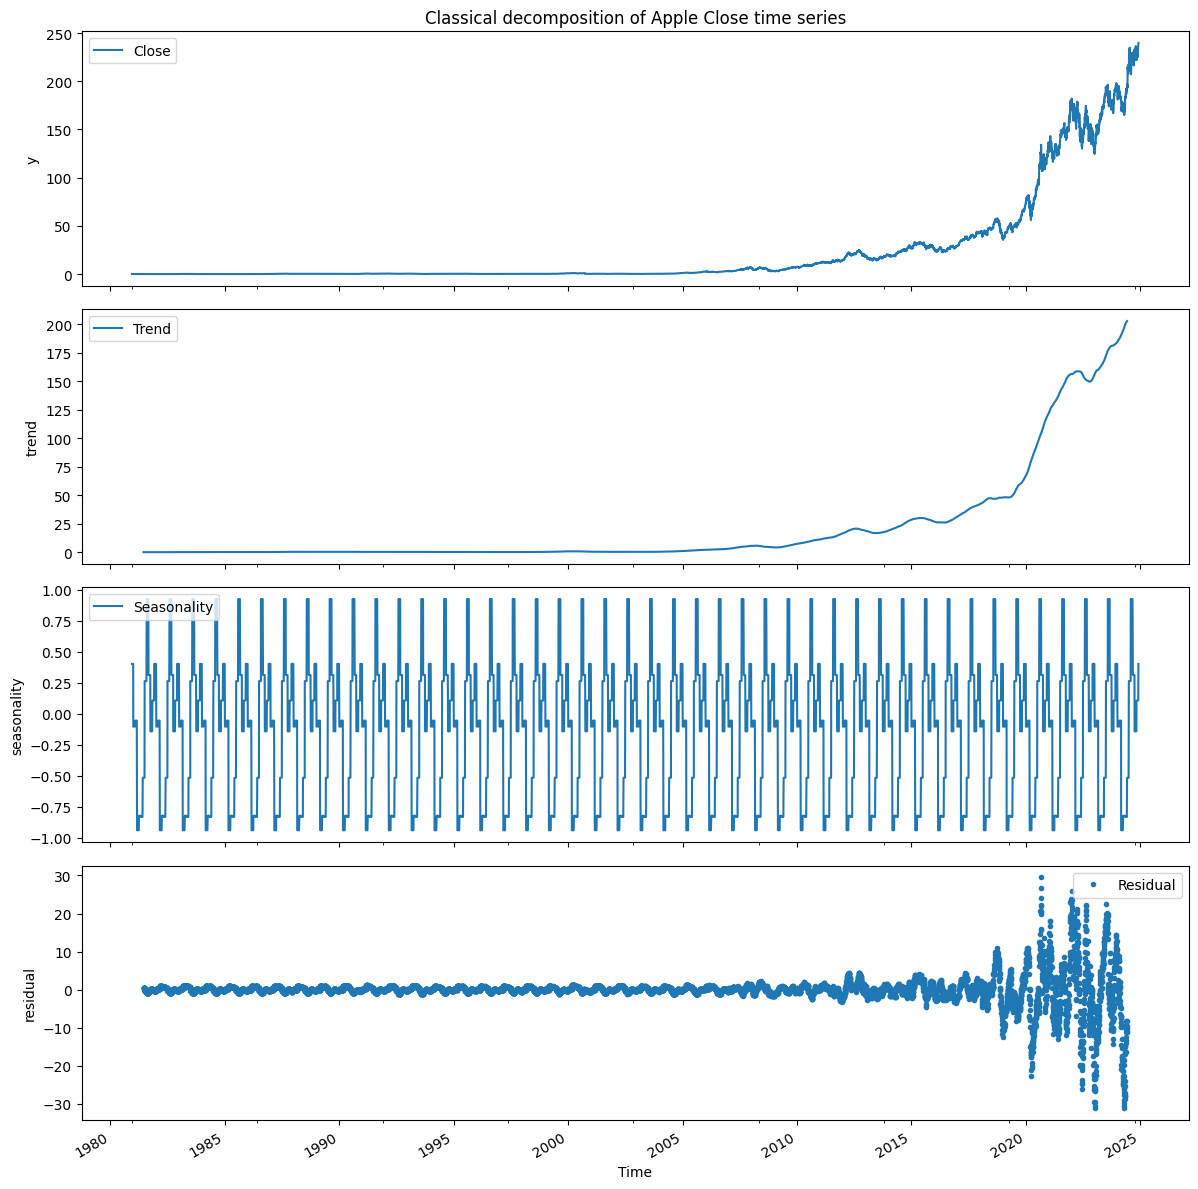

In [12]:
fig, ax = plt.subplots(nrows=4, figsize=[12, 12], sharex=True)

df["Close"].plot(ax=ax[0], legend="y")
ax[0].set_ylabel("y")

df["Trend"].plot(ax=ax[1], legend="trend")
ax[1].set_ylabel("trend")

df["Seasonality"].plot(ax=ax[2], legend="seasonality")
ax[2].set_ylabel("seasonality")

df["Residual"].plot(ax=ax[3], marker=".", legend="residual", ls="None")
ax[3].set_ylabel("residual")

ax[0].set_title("Classical decomposition of Apple Close time series")
ax[3].set_xlabel("Time")

plt.tight_layout()
plt.savefig('outputs/classical_decomposition_apple_close_time_series.png')

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(x=df["Close"], model="additive", period=252)
res.trend.head(10)

Date
1980-12-12   NaN
1980-12-15   NaN
1980-12-16   NaN
1980-12-17   NaN
1980-12-18   NaN
1980-12-19   NaN
1980-12-22   NaN
1980-12-23   NaN
1980-12-24   NaN
1980-12-26   NaN
Name: trend, dtype: float64

In [14]:
res.seasonal.head(10)

Date
1980-12-12    0.492576
1980-12-15    0.487287
1980-12-16    0.656832
1980-12-17    0.637493
1980-12-18    0.580333
1980-12-19    0.840550
1980-12-22    0.777171
1980-12-23    0.659351
1980-12-24    0.691826
1980-12-26    0.444077
Name: seasonal, dtype: float64

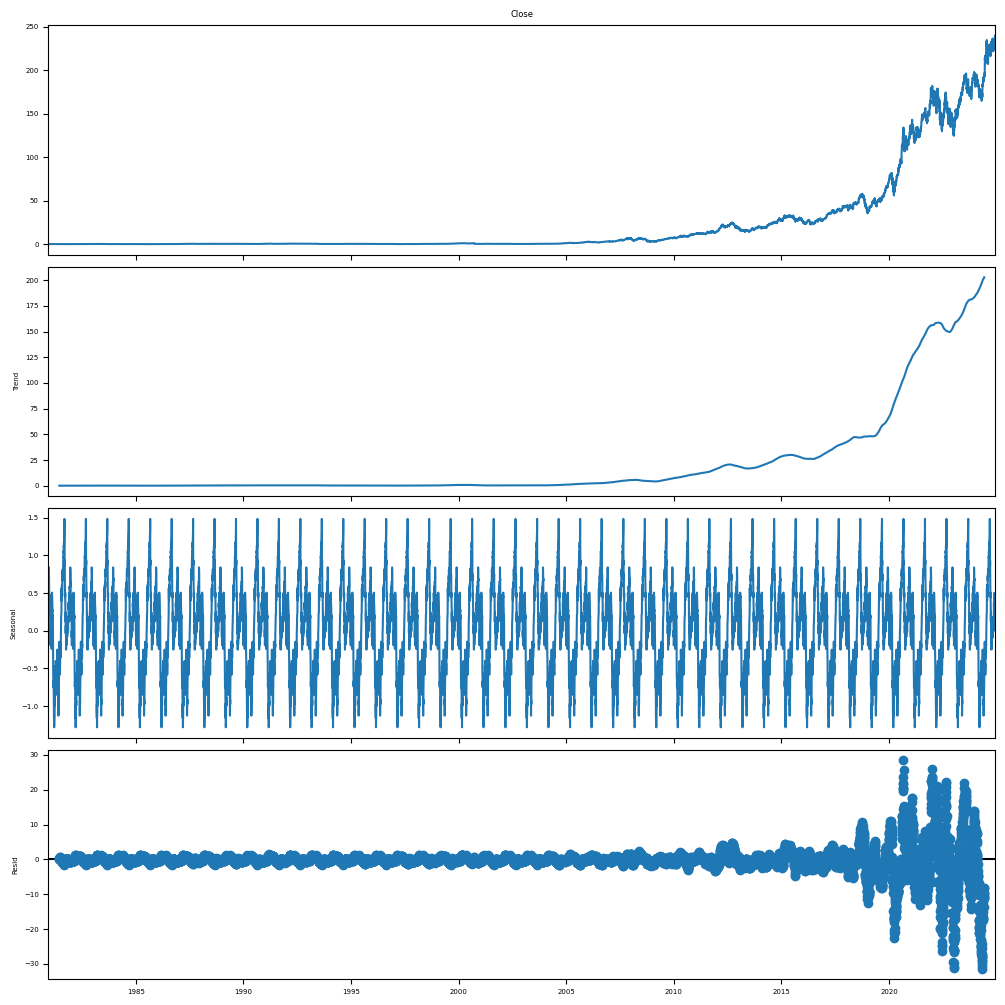

In [15]:
plt.rc("figure", figsize=(10, 10))
plt.rc("font", size=5)
plot = res.plot()
fig = plot.get_figure()
fig.savefig("outputs/classical_decomposition_apple_close_time_series_statsmodels.png")

### 1-1-2. LOWESS

In [16]:
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

In [17]:
# The input of lowess need to be numpy arrays and a numeric type
y = df["Close"]
x = np.arange(0, len(y))  # datetime is not a numeric type
# so we use a sequence of integers
# for the x-values for the purpose of fitting

# lowess returns an array where the first column
# are the x values and the second column are the
# values of the fit at those x values

res = lowess(
    endog=y,  # the y values
    exog=x,  # the corresponding x values
    frac=0.1,  # fraction of dataset to use in window
    it=3,  # Number of iterations for robust regression.
    # The default value of 3 is typically good enough [1].
)

res[:10,]

array([[0.        , 0.09496864],
       [1.        , 0.09501793],
       [2.        , 0.09506731],
       [3.        , 0.09511676],
       [4.        , 0.09516629],
       [5.        , 0.0952159 ],
       [6.        , 0.09526558],
       [7.        , 0.09531534],
       [8.        , 0.09536518],
       [9.        , 0.0954151 ]])

In [18]:
# Append the lowess curve to the original dataframe
df["Lowess"] = res[:, 1]
df.head()

,Adj Close,Close,High,Low,Open,Volume,Trend,Close_Detrended,Month,Seasonality,Residual,Lowess
Date,,,,,,,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,NaN,NaN,12,0.403043,NaN,0.094969
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,NaN,NaN,12,0.403043,NaN,0.095018
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,NaN,NaN,12,0.403043,NaN,0.095067
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,NaN,NaN,12,0.403043,NaN,0.095117
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,NaN,NaN,12,0.403043,NaN,0.095166


Text(0.5, 0, 'Time')

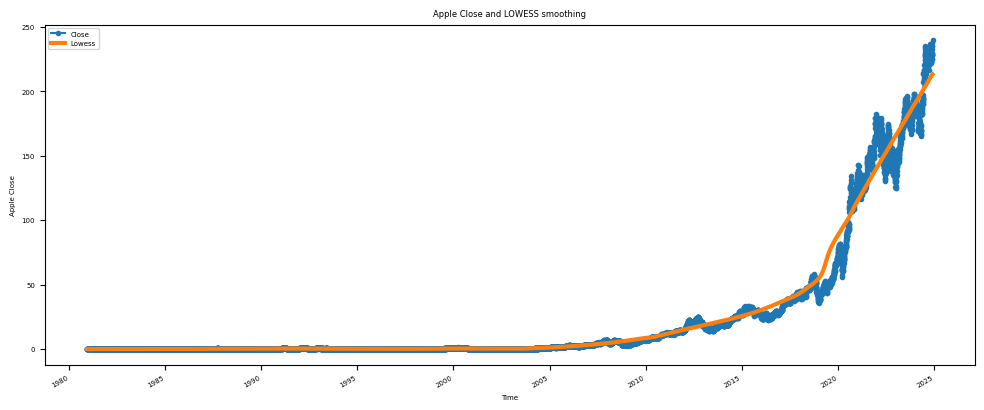

In [19]:
# Plot the fit
fig, ax = plt.subplots(figsize=[12, 5])
df.plot(y="Close", marker=".", ax=ax)
df.plot(y="Lowess", ax=ax, linewidth=3)
ax.set_title("Apple Close and LOWESS smoothing")
ax.set_ylabel("Apple Close")
ax.set_xlabel("Time")

In [20]:
from sklearn.model_selection import KFold

In [21]:
# Helper function to compute the RMSE
def rmse(y, yhat):
    e = y - yhat
    return np.sqrt(np.mean(e**2))

cv_score_by_f = dict()  # Initialise an empty dict to store results
X = np.arange(0, len(df), dtype=float)
y = df["Close"].values

for f in np.arange(0.04, 1.02, 0.02):  # Scan over values from 0.04 to 1
    cv_results = []  # Initialise list to store the result for each fold
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    for train_index, test_index in kfold.split(X, y):
        # Split the data
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]

        # Compute lowess fit
        y_pred = lowess(
            endog=y_train,  # the y values
            exog=X_train,  # the corresponding x values
            frac=f,  # fraction of dataset to use in window
            xvals=X_test,  # Return fitted values only for specific x values
        )

        # Compute loss function
        loss = rmse(y_test, y_pred)
        cv_results.append(loss)

    # Compute average and standard error across all folds
    cv_score_mean = np.mean(cv_results)
    cv_score_by_f[f] = cv_score_mean

results = pd.Series(cv_score_by_f)  # Convert results to pandas dataframe
results.head()

0.04    5.032783
0.06    5.752184
0.08    6.427974
0.10    6.637024
0.12    6.828741
dtype: float64

Text(0, 0.5, 'RMSE')

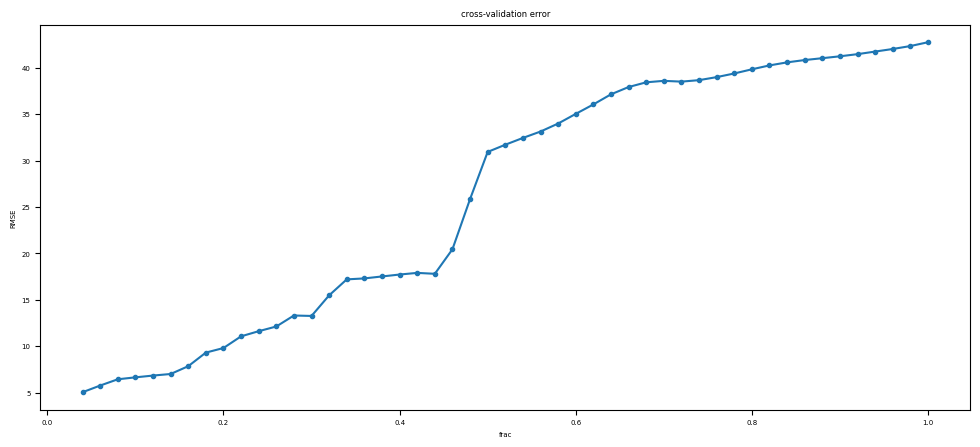

In [22]:
ax = results.plot(marker=".", figsize=[12, 5])
ax.set_xlabel("frac")
ax.set_title("cross-validation error")
ax.set_ylabel("RMSE")

In [23]:
results.index[results.argmin()]

0.04

Text(0.5, 0, 'Time')

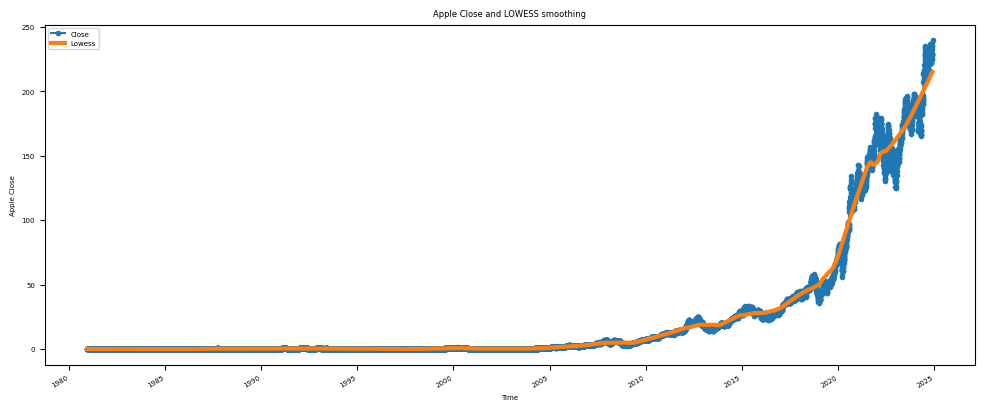

In [24]:
frac = 0.04
y = df["Close"]
x = np.arange(0, len(y))
res = lowess(endog=y, exog=x, frac=frac)
df["Lowess"] = res[:, 1]

# Plot the fit
fig, ax = plt.subplots(figsize=[12, 5])
df.plot(y="Close", marker=".", ax=ax)
df.plot(y="Lowess", ax=ax, linewidth=3)

ax.set_title("Apple Close and LOWESS smoothing")
ax.set_ylabel("Apple Close")
ax.set_xlabel("Time")

### 1-1-3. STL

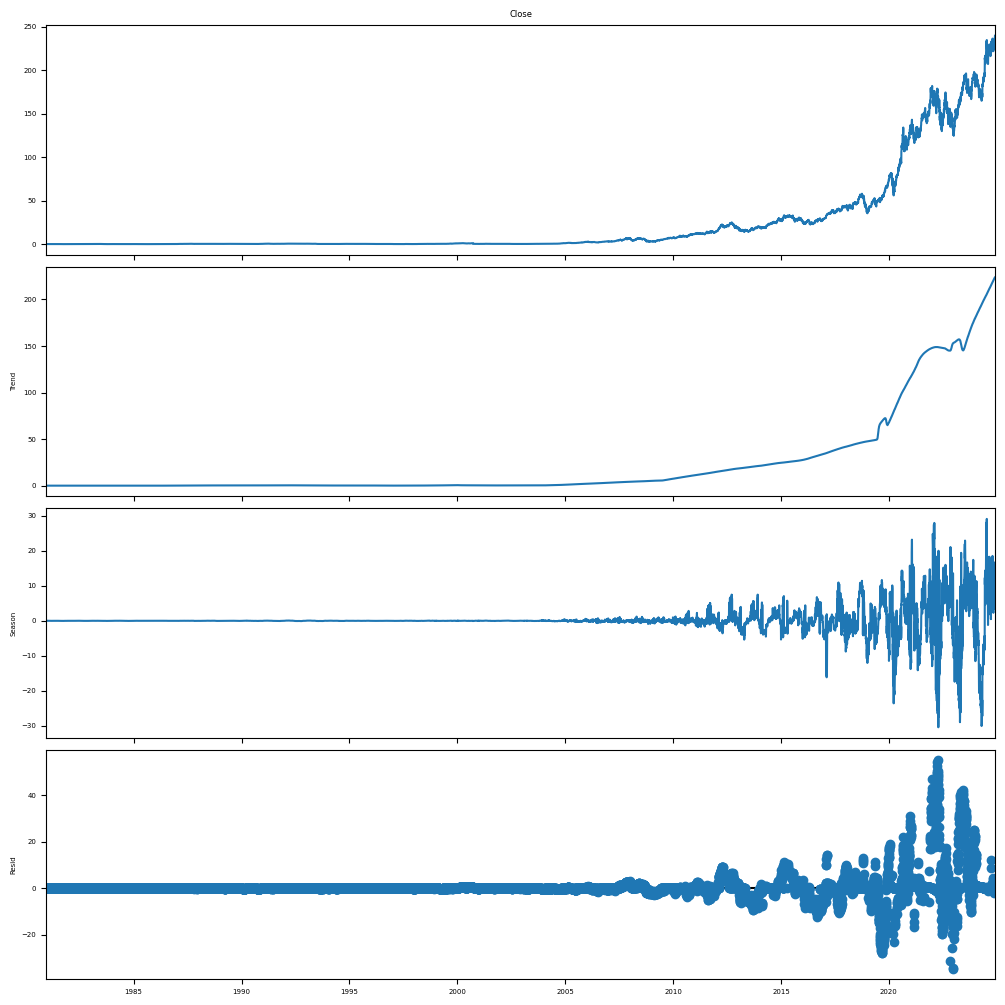

In [25]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
res = STL(
    endog=df["Close"],  # Y values
    period=252,  # The periodicity of the seasonal component
    seasonal=7,  # Determines the window size for LOESS used
    # when smoothing the seasonal component
    # (i.e, the cycle-subseries)
    robust=True  # Flag to use robust regression when
    # fitting the LOESS curves so the fit
    # is robust to outliers
).fit()

# Plot the full decomposition
plt.rc("figure", figsize=(10, 10))
plt.rc("font", size=5)
plot = res.plot()
fig = plot.get_figure()
fig.savefig("outputs/stl_decomposition_apple_close_time_series.png")

In [26]:
# Extract the trend and seasonality individually
df["Trend"] = res.trend
df["Seasonality"] = res.seasonal
df.head()

,Adj Close,Close,High,Low,Open,Volume,Trend,Close_Detrended,Month,Seasonality,Residual,Lowess
Date,,,,,,,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,0.132757,NaN,12,-0.002425,NaN,0.138142
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,0.132585,NaN,12,-0.007966,NaN,0.137935
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,0.132412,NaN,12,-0.012574,NaN,0.137729
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.132240,NaN,12,-0.009342,NaN,0.137523
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.132067,NaN,12,-0.003782,NaN,0.137316


Text(0, 0.5, 'Seasonal component')

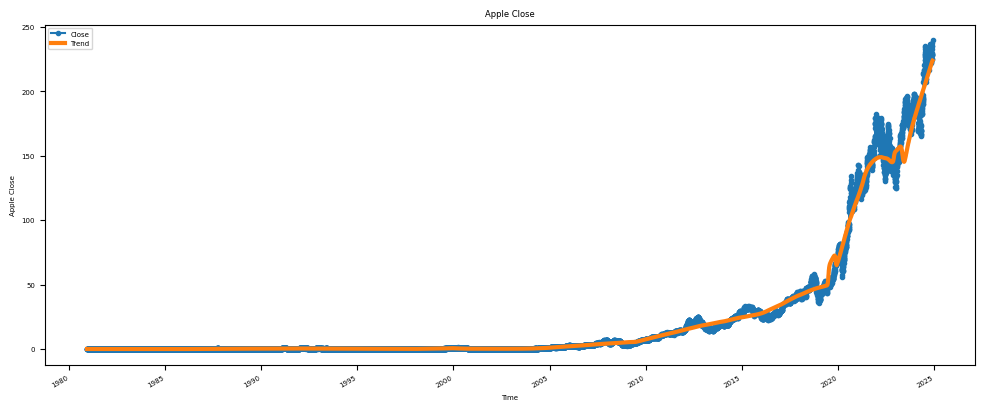

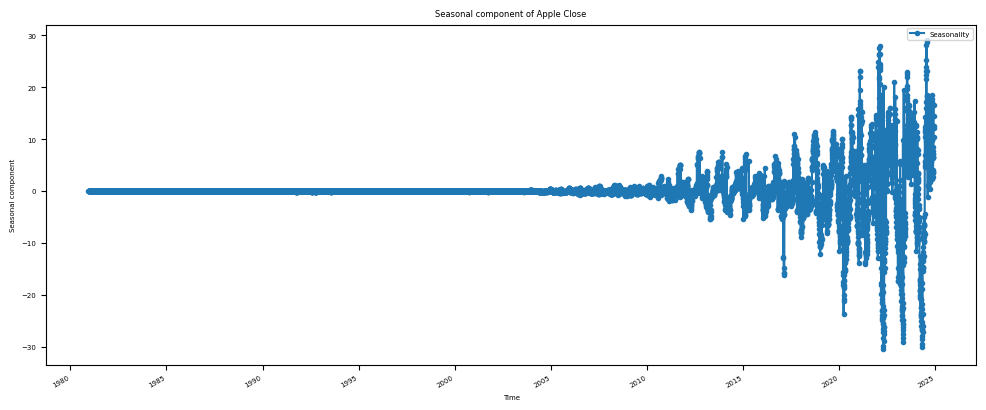

In [27]:
# Plot the trend
fig, ax = plt.subplots(figsize=[12, 5])
df.plot(y="Close", marker=".", ax=ax)
df.plot(y="Trend", ax=ax, linewidth=3)
ax.set_title("Apple Close")
ax.set_xlabel("Time")
ax.set_ylabel("Apple Close")

# Plot seasonality
fig, ax = plt.subplots(figsize=[12, 5])
df.plot(y="Seasonality", marker=".", ax=ax)
ax.set_title("Seasonal component of Apple Close")
ax.set_xlabel("Time")
ax.set_ylabel("Seasonal component")

## 1-2. Lag Features
1. `pandas.DataFrame.shift(periods=1, freq=None, axis=0, fill_value=<no_default>, suffix=None)`: Shifts index by desired number of periods with an optional time `freq`.

In [28]:
df_ = df.copy()  # Create a copy to preserve the original dataframe
                 # for later use.

lag = 1  # As the time series is uniformly spaced by months we can
         # specify the lag in terms of the number of periods. In
         # this case the period is in unit of months.

df_[f"Close_Lag_{lag}"] = df_["Close"].shift(periods=lag)
df_.head()

,Adj Close,Close,High,Low,Open,Volume,Trend,Close_Detrended,Month,Seasonality,Residual,Lowess,Close_Lag_1
Date,,,,,,,,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,0.132757,NaN,12,-0.002425,NaN,0.138142,NaN
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,0.132585,NaN,12,-0.007966,NaN,0.137935,0.128348
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,0.132412,NaN,12,-0.012574,NaN,0.137729,0.121652
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.132240,NaN,12,-0.009342,NaN,0.137523,0.112723
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.132067,NaN,12,-0.003782,NaN,0.137316,0.115513


<Axes: xlabel='Date'>

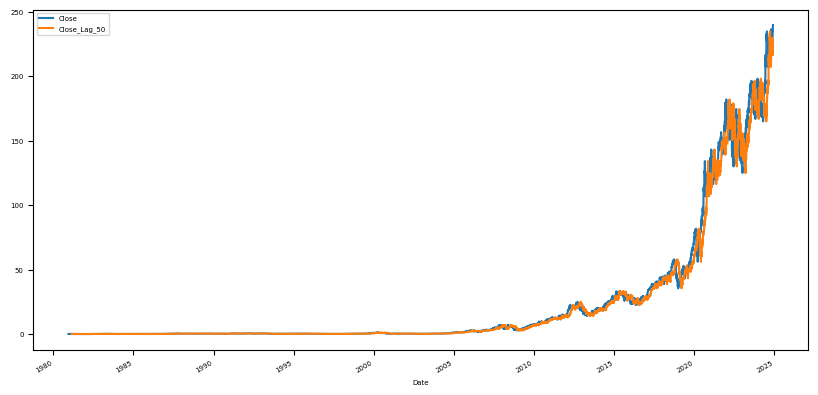

In [29]:
# Compute the lag
df["Close_Lag_50"] = df["Close"].shift(periods=50)

# Plot the sales and the lag 100 sales
df.plot(y=["Close", "Close_Lag_50"], figsize=[10, 5])

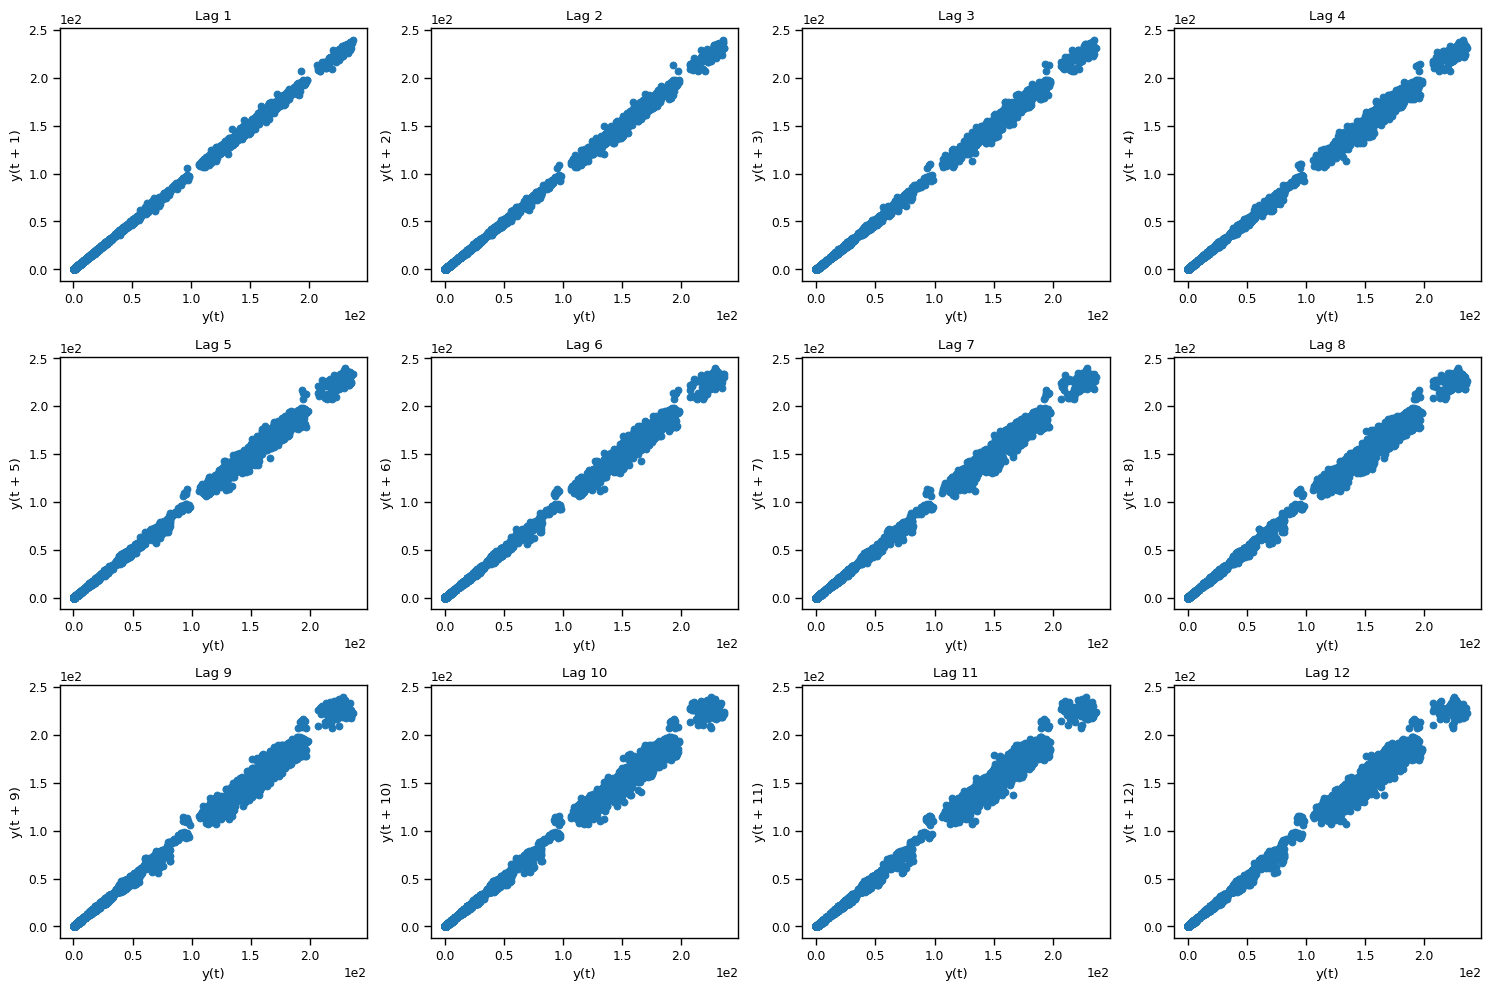

In [30]:
# Lag plot
import seaborn as sns

with sns.plotting_context("paper"):
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=[15, 10])
    for i, ax_ in enumerate(ax.flatten()):
        pd.plotting.lag_plot(df["Close"], lag=i + 1, ax=ax_)
        ax_.set_title(f"Lag {i+1}")
        ax_.ticklabel_format(style="sci", scilimits=(0, 0))
    plt.tight_layout()

## 1-3. Window Features
### 1-3-1. Rolling Window

In [31]:
# Create a custom metric for the MAD
def mad(x):
    return np.median(np.abs(x - np.median(x)))

result = (
    df["Close"]
    .rolling(window=50) # Pick window size.
    .agg(["mean", "std", mad]) # Pick statistics.
    .shift(periods=1) # Lag by 1 day to avoid data leakage.
)  

result = result.add_prefix("Close_Window_50_")
result

,Close_Window_50_mean,Close_Window_50_std,Close_Window_50_mad
Date,,,
1980-12-12,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN
...,...,...,...
2024-11-25,227.734000,4.335529,2.490005
2024-11-26,228.064999,4.069962,2.450005
2024-11-27,228.430399,3.851300,2.450005


In [32]:
df = df.join(result, how="left")
df

,Adj Close,Close,High,Low,Open,Volume,Trend,Close_Detrended,Month,Seasonality,Residual,Lowess,Close_Lag_50,Close_Window_50_mean,Close_Window_50_std,Close_Window_50_mad
Date,,,,,,,,,,,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,0.132757,NaN,12,-0.002425,NaN,0.138142,NaN,NaN,NaN,NaN
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,0.132585,NaN,12,-0.007966,NaN,0.137935,NaN,NaN,NaN,NaN
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,0.132412,NaN,12,-0.012574,NaN,0.137729,NaN,NaN,NaN,NaN
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.132240,NaN,12,-0.009342,NaN,0.137523,NaN,NaN,NaN,NaN
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.132067,NaN,12,-0.003782,NaN,0.137316,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800,222.992767,NaN,11,10.467144,NaN,214.477860,216.320007,227.734000,4.335529,2.490005
2024-11-26,235.059998,235.059998,235.570007,233.330002,233.330002,45986200,223.178279,NaN,11,12.478417,NaN,214.600137,216.789993,228.064999,4.069962,2.450005
2024-11-27,234.929993,234.929993,235.690002,233.809998,234.470001,33498400,223.363777,NaN,11,12.169692,NaN,214.722416,220.690002,228.430399,3.851300,2.450005


### 1-3-2. Expanding Window

In [33]:
# Create a custom metric for the MAD
def mad(x):
    return np.median(np.abs(x - np.median(x)))

result = (
    df["Close"]
    .expanding()  # Use `expanding` rather than `rolling`.
    .agg(["mean", "std", mad]) # Pick statistics.
    .shift(periods=1) # Lag by 1 day to avoid data leakage.
)  

result = result.add_prefix("Close_Expanding_Window_")
result

,Close_Expanding_Window_mean,Close_Expanding_Window_std,Close_Expanding_Window_mad
Date,,,
1980-12-12,NaN,NaN,NaN
1980-12-15,0.128348,NaN,0.000000
1980-12-16,0.125000,0.004735,0.003348
1980-12-17,0.120908,0.007839,0.006696
1980-12-18,0.119559,0.006946,0.004464
...,...,...,...
2024-11-25,23.815547,49.060595,0.449777
2024-11-26,23.834413,49.098562,0.449777
2024-11-27,23.853473,49.137331,0.449888


In [34]:
df = df.join(result, how="left")
df

,Adj Close,Close,High,Low,Open,Volume,Trend,Close_Detrended,Month,Seasonality,Residual,Lowess,Close_Lag_50,Close_Window_50_mean,Close_Window_50_std,Close_Window_50_mad,Close_Expanding_Window_mean,Close_Expanding_Window_std,Close_Expanding_Window_mad
Date,,,,,,,,,,,,,,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,0.132757,NaN,12,-0.002425,NaN,0.138142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,0.132585,NaN,12,-0.007966,NaN,0.137935,NaN,NaN,NaN,NaN,0.128348,NaN,0.000000
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,0.132412,NaN,12,-0.012574,NaN,0.137729,NaN,NaN,NaN,NaN,0.125000,0.004735,0.003348
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.132240,NaN,12,-0.009342,NaN,0.137523,NaN,NaN,NaN,NaN,0.120908,0.007839,0.006696
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.132067,NaN,12,-0.003782,NaN,0.137316,NaN,NaN,NaN,NaN,0.119559,0.006946,0.004464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800,222.992767,NaN,11,10.467144,NaN,214.477860,216.320007,227.734000,4.335529,2.490005,23.815547,49.060595,0.449777
2024-11-26,235.059998,235.059998,235.570007,233.330002,233.330002,45986200,223.178279,NaN,11,12.478417,NaN,214.600137,216.789993,228.064999,4.069962,2.450005,23.834413,49.098562,0.449777
2024-11-27,234.929993,234.929993,235.690002,233.809998,234.470001,33498400,223.363777,NaN,11,12.169692,NaN,214.722416,220.690002,228.430399,3.851300,2.450005,23.853473,49.137331,0.449888


### 1-3-3. Weighted Rolling Window

In [35]:
# Define our own weighted mean function to pass to .apply()
def weighted_mean(x, weights):
    return (weights * x).sum() / weights.sum()

# Define our own weighted std function to pass to .apply()
def weighted_std(x, weights):
    mean_w = weighted_mean(x, weights)
    var_w = (weights * (x - mean_w)**2).sum() / weights.sum()
    return np.sqrt(var_w)

# Specify weights
# Here we shall use linear weights
weights = np.arange(1, 252 + 1)  # [1, 2, ..., 253]

# Compute weighted mean
result = (
    df["Close"]
    .rolling(window=252) # Pick window size. Needs to be same as len(weights).
    .apply(weighted_mean, args=(weights,)) # Apply our custom function.
    .shift(periods=1) # Lag by 1 day to avoid data leakage.
    .to_frame() # Convert output from Series to DataFrame.
)  

result.columns = ["Close_Weighted_Window_252_Mean"]
result

,Close_Weighted_Window_252_Mean
Date,
1980-12-12,NaN
1980-12-15,NaN
1980-12-16,NaN
1980-12-17,NaN
1980-12-18,NaN
...,...
2024-11-25,211.783740
2024-11-26,212.028664
2024-11-27,212.289554


In [36]:
df = df.join(result, how="left")
df

,Adj Close,Close,High,Low,Open,Volume,Trend,Close_Detrended,Month,Seasonality,Residual,Lowess,Close_Lag_50,Close_Window_50_mean,Close_Window_50_std,Close_Window_50_mad,Close_Expanding_Window_mean,Close_Expanding_Window_std,Close_Expanding_Window_mad,Close_Weighted_Window_252_Mean
Date,,,,,,,,,,,,,,,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,0.132757,NaN,12,-0.002425,NaN,0.138142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,0.132585,NaN,12,-0.007966,NaN,0.137935,NaN,NaN,NaN,NaN,0.128348,NaN,0.000000,NaN
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,0.132412,NaN,12,-0.012574,NaN,0.137729,NaN,NaN,NaN,NaN,0.125000,0.004735,0.003348,NaN
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.132240,NaN,12,-0.009342,NaN,0.137523,NaN,NaN,NaN,NaN,0.120908,0.007839,0.006696,NaN
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.132067,NaN,12,-0.003782,NaN,0.137316,NaN,NaN,NaN,NaN,0.119559,0.006946,0.004464,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800,222.992767,NaN,11,10.467144,NaN,214.477860,216.320007,227.734000,4.335529,2.490005,23.815547,49.060595,0.449777,211.783740
2024-11-26,235.059998,235.059998,235.570007,233.330002,233.330002,45986200,223.178279,NaN,11,12.478417,NaN,214.600137,216.789993,228.064999,4.069962,2.450005,23.834413,49.098562,0.449777,212.028664
2024-11-27,234.929993,234.929993,235.690002,233.809998,234.470001,33498400,223.363777,NaN,11,12.169692,NaN,214.722416,220.690002,228.430399,3.851300,2.450005,23.853473,49.137331,0.449888,212.289554


In [37]:
result = (
    df["Close"]
    .rolling(window=252)  # Pick window size.
    .agg(["mean"])  # Pass our own functions.
    .shift(periods=1)  # Lag by 1 day to avoid data leakage.
)  
result

,mean
Date,
1980-12-12,NaN
1980-12-15,NaN
1980-12-16,NaN
1980-12-17,NaN
1980-12-18,NaN
...,...
2024-11-25,201.887182
2024-11-26,202.057421
2024-11-27,202.237063


In [38]:
result.columns = ["Close_Window_252_Mean"]

df = df.join(result, how="left")
df

,Adj Close,Close,High,Low,Open,Volume,Trend,Close_Detrended,Month,Seasonality,...,Lowess,Close_Lag_50,Close_Window_50_mean,Close_Window_50_std,Close_Window_50_mad,Close_Expanding_Window_mean,Close_Expanding_Window_std,Close_Expanding_Window_mad,Close_Weighted_Window_252_Mean,Close_Window_252_Mean
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,0.132757,NaN,12,-0.002425,...,0.138142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,0.132585,NaN,12,-0.007966,...,0.137935,NaN,NaN,NaN,NaN,0.128348,NaN,0.000000,NaN,NaN
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,0.132412,NaN,12,-0.012574,...,0.137729,NaN,NaN,NaN,NaN,0.125000,0.004735,0.003348,NaN,NaN
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.132240,NaN,12,-0.009342,...,0.137523,NaN,NaN,NaN,NaN,0.120908,0.007839,0.006696,NaN,NaN
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.132067,NaN,12,-0.003782,...,0.137316,NaN,NaN,NaN,NaN,0.119559,0.006946,0.004464,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800,222.992767,NaN,11,10.467144,...,214.477860,216.320007,227.734000,4.335529,2.490005,23.815547,49.060595,0.449777,211.783740,201.887182
2024-11-26,235.059998,235.059998,235.570007,233.330002,233.330002,45986200,223.178279,NaN,11,12.478417,...,214.600137,216.789993,228.064999,4.069962,2.450005,23.834413,49.098562,0.449777,212.028664,202.057421
2024-11-27,234.929993,234.929993,235.690002,233.809998,234.470001,33498400,223.363777,NaN,11,12.169692,...,214.722416,220.690002,228.430399,3.851300,2.450005,23.853473,49.137331,0.449888,212.289554,202.237063


Text(0.5, 0, 'Time')

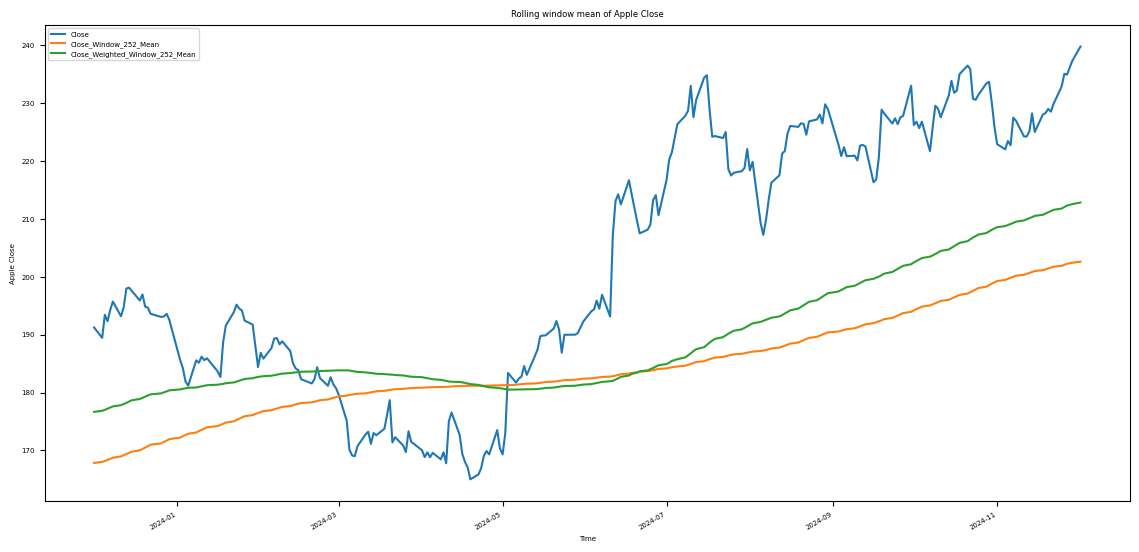

In [39]:
cols = ["Close", "Close_Window_252_Mean", "Close_Weighted_Window_252_Mean"]

ax = (
    df.iloc[-252:] # Let's look at the last 1 year of data
      .loc[:, cols] # Filter to columns of interest
      .plot(figsize=[14, 7])
    )  

ax.set_title("Rolling window mean of Apple Close")
ax.set_ylabel("Apple Close")
ax.set_xlabel("Time")

## 1-4. Trend Features 
### 1-4-1. Linear Trends

In [40]:
# !pip install sktime
from sktime.transformations.series.time_since import TimeSince

In [41]:
transformer = TimeSince(
    start=["1980-12-12", "2024-01-01"],  # A list of start dates.
    # If `None`, uses earliest time in dataframe.
    to_numeric=True,  # Convert output to integer or keep as time-like.
    # Default is `True`
    freq="D",  # Specify time series frequency if not specified in dataframe.
    # Default is `None` and it is inferred from the dataframe index.
    positive_only=False,  # Set negative values to zero.
    # Default is `False`
    keep_original_columns=False,  # Keep the other columns in the dataframe
    # after passing to `.transform()`.
    # Default is `False`
)

transformer.fit(df)

TimeSince(freq='D', start=['1980-12-12', '2024-01-01'])

In [42]:
print(
    [
        transformer.start,
        transformer.freq,
    ]
)

[['1980-12-12', '2024-01-01'], 'D']


In [43]:
df_time_since = transformer.transform(df)
df_time_since

,time_since_1980-12-12 00:00:00,time_since_2024-01-01 00:00:00
Date,,
1980-12-12,0,-15725
1980-12-15,3,-15722
1980-12-16,4,-15721
1980-12-17,5,-15720
1980-12-18,6,-15719
...,...,...
2024-11-25,16054,329
2024-11-26,16055,330
2024-11-27,16056,331


### 1-4-2. Non-linear Trends

In [44]:
df_time_since['time_since_1980-12-12 00:00:00^2'] = df_time_since['time_since_1980-12-12 00:00:00'] ** 2
df_time_since.head()

,time_since_1980-12-12 00:00:00,time_since_2024-01-01 00:00:00,time_since_1980-12-12 00:00:00^2
Date,,,
1980-12-12,0,-15725,0
1980-12-15,3,-15722,9
1980-12-16,4,-15721,16
1980-12-17,5,-15720,25
1980-12-18,6,-15719,36


In [45]:
# Let's ensure all sklearn transformers output pandas dataframes
from sklearn import set_config
from sklearn.preprocessing import PolynomialFeatures

set_config(transform_output="pandas")  # Upgrade to scikit-learn 0.12
                                       # for this feature

# Create and use the polynomial transformer.
poly_transformer = PolynomialFeatures(
    degree=2, # degree of polynomial
    include_bias=False  # exclude constant term
)

# Create polynomial features from a given column
result = poly_transformer.fit_transform(df_time_since[["time_since_1980-12-12 00:00:00"]])
result

,time_since_1980-12-12 00:00:00,time_since_1980-12-12 00:00:00^2
Date,,
1980-12-12,0.0,0.0
1980-12-15,3.0,9.0
1980-12-16,4.0,16.0
1980-12-17,5.0,25.0
1980-12-18,6.0,36.0
...,...,...
2024-11-25,16054.0,257730916.0
2024-11-26,16055.0,257763025.0
2024-11-27,16056.0,257795136.0


In [46]:
from sklearn.pipeline import make_pipeline

time_feats = make_pipeline(TimeSince(freq="D"), PolynomialFeatures(degree=2, include_bias=False))

# Create a new copy of the original data.
df_close = df['Close'].copy().to_frame()

result = time_feats.fit_transform(df_close[['Close']])
result

,time_since_1980-12-12 00:00:00,time_since_1980-12-12 00:00:00^2
Date,,
1980-12-12,0.0,0.0
1980-12-15,3.0,9.0
1980-12-16,4.0,16.0
1980-12-17,5.0,25.0
1980-12-18,6.0,36.0
...,...,...
2024-11-25,16054.0,257730916.0
2024-11-26,16055.0,257763025.0
2024-11-27,16056.0,257795136.0


### 1-4-3. Changepoints

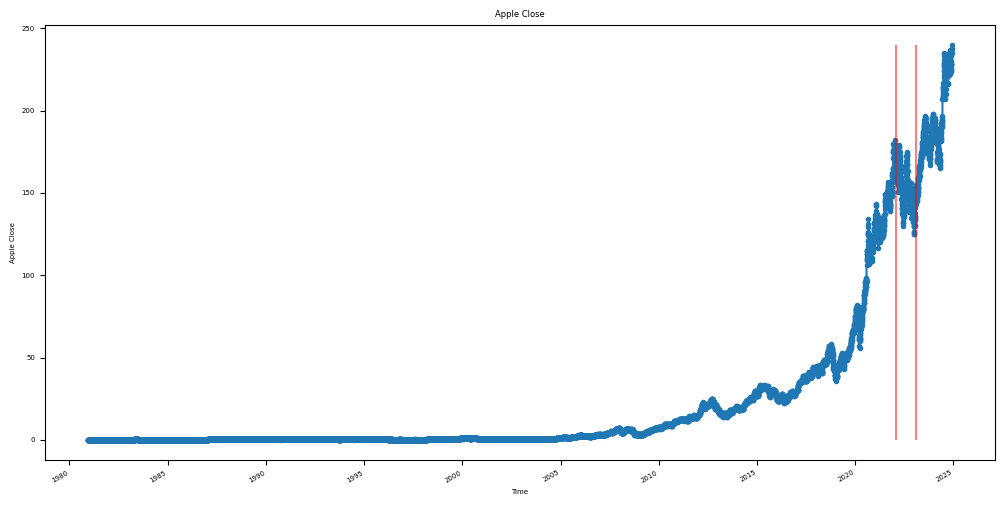

In [47]:
fig, ax = plt.subplots(figsize=[10, 5])
df['Close'].plot(y="y", marker=".", figsize=[10, 5], legend=None, ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Apple Close")
ax.set_title("Apple Close")
ax.vlines(
    ["2022-02-01", "2023-02-01"],
    ymin=df["Close"].min(),
    ymax=df["Close"].max(),
    color="r",
    alpha=0.5,
)
plt.tight_layout()

In [48]:
df_changepoints = df['Close'].copy().to_frame()

changepoints = [
    "1980-12-12",  # start of time series
    "2022-02-01",  # changepoint
    "2023-02-01",  # changepoint
]

for changepoint in changepoints:
    changepoint_dt = pd.to_datetime(changepoint)
    feat_name = f"time_since_{changepoint_dt}"
    time_diff = df_changepoints.index - changepoint_dt
    # Convert from time delta to numeric
    time_diff = np.round(time_diff / np.timedelta64(1, "D"))
    df_changepoints[feat_name] = time_diff
    df_changepoints[feat_name] = df_changepoints[feat_name].clip(0)

df_changepoints.loc[
    changepoint_dt - np.timedelta64(5, "D") : changepoint_dt + np.timedelta64(5, "D")
]

,Close,time_since_1980-12-12 00:00:00,time_since_2022-02-01 00:00:00,time_since_2023-02-01 00:00:00
Date,,,,
2023-01-27,145.929993,15386.0,360.0,0.0
2023-01-30,143.000000,15389.0,363.0,0.0
2023-01-31,144.289993,15390.0,364.0,0.0
2023-02-01,145.429993,15391.0,365.0,0.0
2023-02-02,150.820007,15392.0,366.0,1.0
2023-02-03,154.500000,15393.0,367.0,2.0
2023-02-06,151.729996,15396.0,370.0,5.0


## 1-5. Seasonality Features
### 1-5-1. Seasonal Lag Features

In [49]:
# Lag and window features
from sktime.transformations.series.summarize import WindowSummarizer
# Time features for trend 
from sktime.transformations.series.time_since import TimeSince
from sklearn.preprocessing import PolynomialFeatures
# Rescaling transformer for linear models with regularisation
from sklearn.preprocessing import MinMaxScaler
# Pipelines to create feature engineering pipeline
from sklearn.pipeline import make_pipeline, make_union
# Used to reset sklearn estimators
from sklearn.base import clone

# Let's ensure all sklearn transformers output pandas dataframes
from sklearn import set_config
set_config(transform_output="pandas")  # Upgrade to scikit-learn >= 0.12
                                       # for this feature

df_seasonality = df['Close'].copy().to_frame()
df_seasonality.head()

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862


In [50]:
target = ["Close"]  # Note: it's in a list.
# This ensures we'll get
# a dataframe when using df.loc[:, target]
# rather than a pandas Series.
# This can also be useful if we have
# multiple targets.

# Polynomial time features for trend
time_feats = make_pipeline(
    TimeSince(freq="D"), PolynomialFeatures(degree=2, include_bias=False)
)


# Compute lag and window features.
lag_window_feats = WindowSummarizer(
    lag_feature={
        "lag": [21, 252],  # Just using the previous lag and a seasonal lag
    },
    target_cols=target,
    truncate="bfill",  # Backfill missing values from lagging and windowing.
)

# To see how the lag features help
# try commenting them out and just using
# lag features, then try just using datetime
# features.
pipeline = make_union(
    time_feats,
    lag_window_feats,
)

# Apply min-max scaling to all the features
pipeline = make_pipeline(pipeline, MinMaxScaler())
pipeline

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('pipeline',
                                                 Pipeline(steps=[('timesince',
                                                                  TimeSince(freq='D')),
                                                                 ('polynomialfeatures',
                                                                  PolynomialFeatures(include_bias=False))])),
                                                ('windowsummarizer',
                                                 WindowSummarizer(lag_feature={'lag': [21, 252]}, target_cols=['Close'],
                 truncate='bfill'))])),
                ('minmaxscaler', MinMaxScaler())])

In [51]:
pipeline.fit_transform(df_seasonality)

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sktime/transformations/series/summarize.py:299: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[21 252]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  func_dict.loc[:, "window"] = func_dict["window"].astype("object")


,time_since_1980-12-12 00:00:00,time_since_1980-12-12 00:00:00^2,Close_lag_21,Close_lag_252
Date,,,,
1980-12-12,0.000000,0.000000e+00,0.000335,0.000403
1980-12-15,0.000187,3.488971e-08,0.000335,0.000403
1980-12-16,0.000249,6.202615e-08,0.000335,0.000403
1980-12-17,0.000311,9.691586e-08,0.000335,0.000403
1980-12-18,0.000374,1.395588e-07,0.000335,0.000403
...,...,...,...,...
2024-11-25,0.999564,9.991285e-01,0.978556,0.967006
2024-11-26,0.999626,9.992530e-01,0.986973,0.966090
2024-11-27,0.999689,9.993775e-01,0.988115,0.969196


### 1-5-2. Calendar Features

In [52]:
from sktime.transformations.series.date import DateTimeFeatures

df_calendar = df['Close'].copy().to_frame()

transformer = DateTimeFeatures(ts_freq="D", # Frequency of the time series
                               feature_scope="comprehensive", # Can be "comprehensive", 
                                                              # "efficient", "minimal".
                                                              # Depending on the time series
                                                              # frequency a sensible set is 
                                                              # automatically chosen.
                               keep_original_columns=True, # Flag if we want to keep columns
                                                           # in the dataframe passed to `transform`.
                              )

transformer.fit(df_calendar) # This transformer has a fit method which does
                      # not learn any parameters. sktime still  
                      # performs a series of checks when we call `fit` on the time series 
                      # (e.g., is the time series sorted?, are there missing timestamps?).
            
result = transformer.transform(df_calendar) # Create the features from the datetime index. 
result.head()

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sktime/transformations/series/date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sktime/transformations/series/date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(


,Close,year,quarter_of_year,month_of_year,week_of_year,day_of_year,month_of_quarter,week_of_quarter,day_of_quarter,week_of_month,day_of_month,day_of_week,is_weekend
Date,,,,,,,,,,,,,
1980-12-12,0.128348,1980,4,12,50,347,3,11,73,2,12,4,0
1980-12-15,0.121652,1980,4,12,51,350,3,12,76,3,15,0,0
1980-12-16,0.112723,1980,4,12,51,351,3,12,77,3,16,1,0
1980-12-17,0.115513,1980,4,12,51,352,3,12,78,3,17,2,0
1980-12-18,0.118862,1980,4,12,51,353,3,12,79,3,18,3,0


### 1-5-3. Seasonal Dummies

In [53]:
from sktime.transformations.series.date import DateTimeFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

# Let's ensure all sklearn transformers output pandas dataframes
from sklearn import set_config
set_config(transform_output="pandas")  

In [54]:
# Specify which datetime features to create 
# and then convert into dummy/one hot features.
seasonal_dummies = [
                    "week_of_year",
                    "month_of_year",
                   ]


# Create the DateTimeFeatures transformer
datetime_transformer = DateTimeFeatures(manual_selection=seasonal_dummies, # Select which features to
                                                                           # create
                                       keep_original_columns=False, # Flag if we want to keep columns
                                                                    # in dataframe passed to `transform`.
                                      )

# One hot encoder
one_hot_encoder = OneHotEncoder(sparse_output=False, # Required to enable
                                                     # pandas output.
                                drop="first"
                               )

# Combine the two transformers in a pipeline
seasonal_dummies_feats = make_pipeline(datetime_transformer, one_hot_encoder)
seasonal_dummies_feats

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sktime/transformations/series/date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(


Pipeline(steps=[('datetimefeatures',
                 DateTimeFeatures(manual_selection=['week_of_year', 'month_of_year'])),
                ('onehotencoder',
                 OneHotEncoder(drop='first', sparse_output=False))])

In [55]:
df_seasonal_dummies = df['Close'].copy().to_frame()

# Fit and transform to create our features
result = seasonal_dummies_feats.fit_transform(df_seasonal_dummies)
result.head()

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sktime/transformations/series/date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(


,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,...,week_of_year_44,week_of_year_45,week_of_year_46,week_of_year_47,week_of_year_48,week_of_year_49,week_of_year_50,week_of_year_51,week_of_year_52,week_of_year_53
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1980-12-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1980-12-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1980-12-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1980-12-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 2. Machine Learning for Time Series Forecasting

In [56]:
from sklearn.model_selection import TimeSeriesSplit

In [57]:
"""
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
res = STL(
    endog=df["Close"][:-1],  # Y values
    period=252,  # The periodicity of the seasonal component
    seasonal=7,  # Determines the window size for LOESS used
    # when smoothing the seasonal component
    # (i.e, the cycle-subseries)
    robust=True  # Flag to use robust regression when
    # fitting the LOESS curves so the fit
    # is robust to outliers
).fit()

df["Trend"] = res.trend
df["Seasonality"] = res.seasonal
df["Residual"] = df["Close"] - df["Trend"] - df["Seasonality"]
df.head()
"""

'\nfrom statsmodels.tsa.seasonal import STL\n\n# Perform STL decomposition\nres = STL(\n    endog=df["Close"][:-1],  # Y values\n    period=252,  # The periodicity of the seasonal component\n    seasonal=7,  # Determines the window size for LOESS used\n    # when smoothing the seasonal component\n    # (i.e, the cycle-subseries)\n    robust=True  # Flag to use robust regression when\n    # fitting the LOESS curves so the fit\n    # is robust to outliers\n).fit()\n\ndf["Trend"] = res.trend\ndf["Seasonality"] = res.seasonal\ndf["Residual"] = df["Close"] - df["Trend"] - df["Seasonality"]\ndf.head()\n'

In [58]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Trend',
       'Close_Detrended', 'Month', 'Seasonality', 'Residual', 'Lowess',
       'Close_Lag_50', 'Close_Window_50_mean', 'Close_Window_50_std',
       'Close_Window_50_mad', 'Close_Expanding_Window_mean',
       'Close_Expanding_Window_std', 'Close_Expanding_Window_mad',
       'Close_Weighted_Window_252_Mean', 'Close_Window_252_Mean'],
      dtype='object')

In [69]:
len(df)

11085

In [59]:
df.head(10)

,Adj Close,Close,High,Low,Open,Volume,Trend,Close_Detrended,Month,Seasonality,...,Lowess,Close_Lag_50,Close_Window_50_mean,Close_Window_50_std,Close_Window_50_mad,Close_Expanding_Window_mean,Close_Expanding_Window_std,Close_Expanding_Window_mad,Close_Weighted_Window_252_Mean,Close_Window_252_Mean
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,0.132757,NaN,12,-0.002425,...,0.138142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,0.132585,NaN,12,-0.007966,...,0.137935,NaN,NaN,NaN,NaN,0.128348,NaN,0.000000,NaN,NaN
1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,0.132412,NaN,12,-0.012574,...,0.137729,NaN,NaN,NaN,NaN,0.125000,0.004735,0.003348,NaN,NaN
1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.132240,NaN,12,-0.009342,...,0.137523,NaN,NaN,NaN,NaN,0.120908,0.007839,0.006696,NaN,NaN
1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.132067,NaN,12,-0.003782,...,0.137316,NaN,NaN,NaN,NaN,0.119559,0.006946,0.004464,NaN,NaN
1980-12-19,0.097116,0.126116,0.126674,0.126116,0.126116,48630400,0.131894,NaN,12,0.004592,...,0.137110,NaN,NaN,NaN,NaN,0.119420,0.006023,0.003349,NaN,NaN
1980-12-22,0.101842,0.132254,0.132813,0.132254,0.132254,37363200,0.131721,NaN,12,0.006220,...,0.136903,NaN,NaN,NaN,NaN,0.120536,0.006041,0.005301,NaN,NaN
1980-12-23,0.106140,0.137835,0.138393,0.137835,0.137835,46950400,0.131548,NaN,12,0.010539,...,0.136697,NaN,NaN,NaN,NaN,0.122210,0.007073,0.006139,NaN,NaN
1980-12-24,0.111726,0.145089,0.145647,0.145089,0.145089,48003200,0.131375,NaN,12,0.014030,...,0.136490,NaN,NaN,NaN,NaN,0.124163,0.008568,0.006696,NaN,NaN


In [60]:
df.tail(10)

,Adj Close,Close,High,Low,Open,Volume,Trend,Close_Detrended,Month,Seasonality,...,Lowess,Close_Lag_50,Close_Window_50_mean,Close_Window_50_std,Close_Window_50_mad,Close_Expanding_Window_mean,Close_Expanding_Window_std,Close_Expanding_Window_mad,Close_Weighted_Window_252_Mean,Close_Window_252_Mean
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-18,228.020004,228.020004,229.740005,225.169998,225.250000,44686000,222.065009,NaN,11,6.510940,...,213.866506,220.910004,227.039200,4.677818,3.560005,23.723031,48.878009,0.448928,210.704485,201.129682
2024-11-19,228.279999,228.279999,230.160004,226.660004,226.979996,36211800,222.250587,NaN,11,6.592158,...,213.988773,220.110001,227.181400,4.595031,3.170006,23.741476,48.914336,0.449073,210.917057,201.281706
2024-11-20,229.000000,229.000000,229.929993,225.889999,228.059998,35169600,222.436152,NaN,11,7.133392,...,214.111042,222.660004,227.344800,4.482320,3.170006,23.759942,48.950721,0.449218,211.130482,201.434841
2024-11-21,228.520004,228.520004,230.160004,225.710007,228.880005,42108300,222.621703,NaN,11,6.474639,...,214.233313,222.770004,227.471600,4.436529,2.835007,23.778468,48.987337,0.449497,211.348389,201.583849
2024-11-22,229.869995,229.869995,230.720001,228.059998,228.059998,38168300,222.807242,NaN,11,7.645882,...,214.355586,222.500000,227.586600,4.386411,2.550003,23.796949,49.023732,0.449777,211.561323,201.734167
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800,222.992767,NaN,11,10.467144,...,214.477860,216.320007,227.734000,4.335529,2.490005,23.815547,49.060595,0.449777,211.783740,201.887182
2024-11-26,235.059998,235.059998,235.570007,233.330002,233.330002,45986200,223.178279,NaN,11,12.478417,...,214.600137,216.789993,228.064999,4.069962,2.450005,23.834413,49.098562,0.449777,212.028664,202.057421
2024-11-27,234.929993,234.929993,235.690002,233.809998,234.470001,33498400,223.363777,NaN,11,12.169692,...,214.722416,220.690002,228.430399,3.851300,2.450005,23.853473,49.137331,0.449888,212.289554,202.237063
2024-11-29,237.330002,237.330002,237.809998,233.970001,234.809998,28481400,223.549263,NaN,11,14.390991,...,214.844696,228.869995,228.715199,3.793304,2.489998,23.872519,49.176004,0.450000,212.547996,202.413770


In [61]:
"""
# There is a problem of data leakage for time series decomposition
df_ml = df[['Close', 'Volume', 'Trend', 'Seasonality', 'Residual']]
df_ml.tail()
"""

"\n# There is a problem of data leakage for time series decomposition\ndf_ml = df[['Close', 'Volume', 'Trend', 'Seasonality', 'Residual']]\ndf_ml.tail()\n"

In [62]:
"""
df_ml["Trend"] = df_ml["Trend"].shift(1)
df_ml["Seasonality"] = df_ml["Seasonality"].shift(1)
df_ml["Residual"] = df_ml["Residual"].shift(1)
df_ml.tail()
"""

'\ndf_ml["Trend"] = df_ml["Trend"].shift(1)\ndf_ml["Seasonality"] = df_ml["Seasonality"].shift(1)\ndf_ml["Residual"] = df_ml["Residual"].shift(1)\ndf_ml.tail()\n'

In [63]:
"""
df_ml['Lag_1'] = df_ml['Close'].shift(1)
df_ml['Lag_2'] = df_ml['Close'].shift(2)
df_ml['SMA_3'] = df_ml['Close'].rolling(3).mean()
df_ml
"""

"\ndf_ml['Lag_1'] = df_ml['Close'].shift(1)\ndf_ml['Lag_2'] = df_ml['Close'].shift(2)\ndf_ml['SMA_3'] = df_ml['Close'].rolling(3).mean()\ndf_ml\n"

In [64]:
"""
df_ml.dropna(inplace=True)
df_ml
"""

'\ndf_ml.dropna(inplace=True)\ndf_ml\n'

In [65]:
"""
y = df_ml['Close']
y
"""

"\ny = df_ml['Close']\ny\n"

In [66]:
# X = df_ml.drop(columns='Close', axis=1)
# X

In [85]:
# Execute STL after `TimeSeriesSplit` to avoid data leakage
from statsmodels.tsa.seasonal import STL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

ts_cv = TimeSeriesSplit(
    n_splits=5,
    test_size=1,  # for 2 or 3 digits of precision in scores
)
# all_splits = list(ts_cv.split(X, y))
# train_idx, test_idx= all_splits[0]
# print(train_idx, test_idx)

for train_idx, test_idx in ts_cv.split(df['Close'].to_frame()):
    # Close as features
    train_data = df['Close'].to_frame().iloc[train_idx]
    test_data = df['Close'].to_frame().iloc[test_idx]
    
    # Perform STL decomposition
    res = STL(
        endog=train_data,  # Y values
        period=252,  # The periodicity of the seasonal component
        seasonal=7,  # Determines the window size for LOESS used
        # when smoothing the seasonal component
        # (i.e, the cycle-subseries)
        robust=True  # Flag to use robust regression when
        # fitting the LOESS curves so the fit
        # is robust to outliers
    ).fit()

    train_data["Trend"] = res.trend
    train_data["Seasonality"] = res.seasonal
    train_data["Residual"] = train_data["Close"] - train_data["Trend"] - train_data["Seasonality"]
    
    train_data['Lag_Trend'] = train_data['Trend'].shift(1)
    train_data['Lag_Seasonality'] = train_data['Seasonality'].shift(1)
    train_data['Lag_Residual'] = train_data['Residual'].shift(1)

    test_data['Lag_Trend'] = train_data['Trend'].iloc[-1]
    test_data['Lag_Seasonality'] = train_data['Seasonality'].iloc[-1]
    test_data['Lag_Residual'] = train_data['Residual'].iloc[-1]

    # Lag & rolling window features
    train_data['Lag_1'] = train_data['Close'].shift(1)
    train_data['Lag_2'] = train_data['Close'].shift(2)
    train_data['Lag_3'] = train_data['Close'].shift(3)
    train_data['SMA_3'] = train_data['Close'].rolling(3).mean().shift(1)

    test_data['Lag_1'] = train_data['Close'].iloc[-1]
    test_data['Lag_2'] = train_data['Close'].iloc[-2]
    test_data['Lag_3'] = train_data['Close'].iloc[-3]
    test_data['SMA_3'] = train_data['Close'].rolling(3).mean().iloc[-1]

    # Volume & Open as features
    train_data['Volume'] = df['Volume'].iloc[train_idx]
    train_data['Lag_Volume'] = train_data['Volume'].shift(1)
    train_data['Open'] = df['Open'].iloc[train_idx]

    test_data['Lag_Volume'] = train_data['Volume'].iloc[-1]
    test_data['Open'] = df['Open'].iloc[test_idx]

    # Drop first rows with NaN values after shifting
    train_data = train_data.dropna()
    
    X_train = train_data[['Lag_Trend', 'Lag_Seasonality', 'Lag_Residual', 'Lag_1', 'Lag_2', 'Lag_3', 'SMA_3', 'Lag_Volume', 'Open']]
    # X_train = train_data[['Lag_Trend', 'Lag_Seasonality', 'Lag_Residual', 'Lag_1', 'Lag_2', 'Lag_3', 'SMA_3']]
    y_train = train_data['Close']

    X_test = test_data[['Lag_Trend', 'Lag_Seasonality', 'Lag_Residual', 'Lag_1', 'Lag_2', 'Lag_3', 'SMA_3', 'Lag_Volume', 'Open']]
    # X_test = test_data[['Lag_Trend', 'Lag_Seasonality', 'Lag_Residual', 'Lag_1', 'Lag_2', 'Lag_3', 'SMA_3']]
    y_test = test_data['Close']

    print(f"Training Indices: {train_idx}, Testing Index: {test_idx}")
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    print("Train Data:")
    print(train_data.tail())
    print("Test Data:")
    print(test_data.tail())

    # Fit & evaluate models
    model = LinearRegression().fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    print("Test:", y_test.iloc[-1])
    print("Prediction:", y_prediction[0])
    print("MAPE:", mean_absolute_percentage_error(y_test, y_prediction))

    if test_idx + 1 != len(df):
        print()

Training Indices: [    0     1     2 ... 11077 11078 11079], Testing Index: [11080]
(11077, 9) (1, 9) (11077,) (1,)
Train Data:
                 Close       Trend  Seasonality  Residual   Lag_Trend  \
Date                                                                    
2024-11-18  228.020004  219.991415     7.800255  0.228334  219.834083   
2024-11-19  228.279999  220.148753     7.901231  0.230015  219.991415   
2024-11-20  229.000000  220.306097     8.462208  0.231695  220.148753   
2024-11-21  228.520004  220.463447     7.823182  0.233375  220.306097   
2024-11-22  229.869995  220.620803     9.014137  0.235055  220.463447   

            Lag_Seasonality  Lag_Residual       Lag_1       Lag_2       Lag_3  \
Date                                                                            
2024-11-18         4.939264      0.226653  225.000000  228.220001  225.119995   
2024-11-19         7.800255      0.228334  228.020004  225.000000  228.220001   
2024-11-20         7.901231      0.2

In [86]:
# Execute STL after `TimeSeriesSplit` to avoid data leakage
from sklearn.ensemble import HistGradientBoostingRegressor

ts_cv = TimeSeriesSplit(
    n_splits=5,
    test_size=1,  # for 2 or 3 digits of precision in scores
)
# all_splits = list(ts_cv.split(X, y))
# train_idx, test_idx= all_splits[0]
# print(train_idx, test_idx)

for train_idx, test_idx in ts_cv.split(df['Close'].to_frame()):
    # Close as features
    train_data = df['Close'].to_frame().iloc[train_idx]
    test_data = df['Close'].to_frame().iloc[test_idx]
    
    # Perform STL decomposition
    res = STL(
        endog=train_data,  # Y values
        period=252,  # The periodicity of the seasonal component
        seasonal=7,  # Determines the window size for LOESS used
        # when smoothing the seasonal component
        # (i.e, the cycle-subseries)
        robust=True  # Flag to use robust regression when
        # fitting the LOESS curves so the fit
        # is robust to outliers
    ).fit()

    train_data["Trend"] = res.trend
    train_data["Seasonality"] = res.seasonal
    train_data["Residual"] = train_data["Close"] - train_data["Trend"] - train_data["Seasonality"]
    
    train_data['Lag_Trend'] = train_data['Trend'].shift(1)
    train_data['Lag_Seasonality'] = train_data['Seasonality'].shift(1)
    train_data['Lag_Residual'] = train_data['Residual'].shift(1)

    test_data['Lag_Trend'] = train_data['Trend'].iloc[-1]
    test_data['Lag_Seasonality'] = train_data['Seasonality'].iloc[-1]
    test_data['Lag_Residual'] = train_data['Residual'].iloc[-1]

    # Lag & rolling window features
    train_data['Lag_1'] = train_data['Close'].shift(1)
    train_data['Lag_2'] = train_data['Close'].shift(2)
    train_data['Lag_3'] = train_data['Close'].shift(3)
    train_data['SMA_3'] = train_data['Close'].rolling(3).mean().shift(1)

    test_data['Lag_1'] = train_data['Close'].iloc[-1]
    test_data['Lag_2'] = train_data['Close'].iloc[-2]
    test_data['Lag_3'] = train_data['Close'].iloc[-3]
    test_data['SMA_3'] = train_data['Close'].rolling(3).mean().iloc[-1]

    # Volume & Open as features
    train_data['Volume'] = df['Volume'].iloc[train_idx]
    train_data['Lag_Volume'] = train_data['Volume'].shift(1)
    train_data['Open'] = df['Open'].iloc[train_idx]

    test_data['Lag_Volume'] = train_data['Volume'].iloc[-1]
    test_data['Open'] = df['Open'].iloc[test_idx]

    # Drop first rows with NaN values after shifting
    train_data = train_data.dropna()
    
    X_train = train_data[['Lag_Trend', 'Lag_Seasonality', 'Lag_Residual', 'Lag_1', 'Lag_2', 'Lag_3', 'SMA_3', 'Lag_Volume', 'Open']]
    # X_train = train_data[['Lag_Trend', 'Lag_Seasonality', 'Lag_Residual', 'Lag_1', 'Lag_2', 'Lag_3', 'SMA_3']]
    y_train = train_data['Close']

    X_test = test_data[['Lag_Trend', 'Lag_Seasonality', 'Lag_Residual', 'Lag_1', 'Lag_2', 'Lag_3', 'SMA_3', 'Lag_Volume', 'Open']]
    # X_test = test_data[['Lag_Trend', 'Lag_Seasonality', 'Lag_Residual', 'Lag_1', 'Lag_2', 'Lag_3', 'SMA_3']]
    y_test = test_data['Close']

    print(f"Training Indices: {train_idx}, Testing Index: {test_idx}")
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    print("Train Data:")
    print(train_data.tail())
    print("Test Data:")
    print(test_data.tail())

    # Fit & evaluate models
    model = HistGradientBoostingRegressor(random_state=0).fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    print("Test:", y_test.iloc[-1])
    print("Prediction:", y_prediction[0])
    print("MAPE:", mean_absolute_percentage_error(y_test, y_prediction))

    if test_idx + 1 != len(df):
        print()

Training Indices: [    0     1     2 ... 11077 11078 11079], Testing Index: [11080]
(11077, 9) (1, 9) (11077,) (1,)
Train Data:
                 Close       Trend  Seasonality  Residual   Lag_Trend  \
Date                                                                    
2024-11-18  228.020004  219.991415     7.800255  0.228334  219.834083   
2024-11-19  228.279999  220.148753     7.901231  0.230015  219.991415   
2024-11-20  229.000000  220.306097     8.462208  0.231695  220.148753   
2024-11-21  228.520004  220.463447     7.823182  0.233375  220.306097   
2024-11-22  229.869995  220.620803     9.014137  0.235055  220.463447   

            Lag_Seasonality  Lag_Residual       Lag_1       Lag_2       Lag_3  \
Date                                                                            
2024-11-18         4.939264      0.226653  225.000000  228.220001  225.119995   
2024-11-19         7.800255      0.228334  228.020004  225.000000  228.220001   
2024-11-20         7.901231      0.2

In [ ]:
"""
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
print(len(X_train), len(X_test), len(y_train), len(y_test))
"""

In [ ]:
"""
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error

model = HistGradientBoostingRegressor(random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_test.iloc[-1])
print(y_pred[0])
print(mean_absolute_percentage_error(y_test, y_pred))
"""

In [ ]:
"""
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_test.iloc[-1])
print(y_pred[0])
print(mean_absolute_percentage_error(y_test, y_pred))
"""

In [ ]:
"""
for i in range(len(all_splits)):
    train_idx, test_idx = all_splits[i]
    print(train_idx, test_idx)
"""